In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#다운로드 받은 csv 파일을 여기에 업로드
from google.colab import files
uploaded = files.upload()

Saving laptop_price.csv to laptop_price (2).csv


##Basic Setting

In [ ]:
df = pd.read_csv('laptop_price.csv', encoding = "ISO-8859-1")

In [ ]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [ ]:
len(df['Product'].unique())

618

#Data Preprocessing

In [ ]:
df=df.drop(columns=['laptop_ID', 'Product'], axis=1)

##Change ScreenResolution

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
#Resloution & Screen_type으로 분해
df['Resolution'] =df['ScreenResolution'].str.extract(r'(\d+x\d+)')
df['Screen_type'] = df['ScreenResolution'].replace(r'(\d+x\d+)','',regex=True)
df['Screen_type'] = df['Screen_type'].replace(r'(full hd|quad hd|quad hd|\+|/|4k ultra hd)','',regex=True)

#Touchscreen 분해
df['Touchscreen'] = df['Screen_type'].str.extract(r'(Touchscreen)')

df['Screen_type'] = df['Screen_type'].replace(r'Touchscreen','',regex=True)
df['Screen_type']= df['Screen_type'].replace(r' ','',regex=True)

df['Touchscreen'] = df['Touchscreen'].replace('Touchscreen',1)
df['Touchscreen'] = df['Touchscreen'].replace(np.nan,0)

##Change RAM Column

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Ram']=df['Ram'].astype(int)

In [ ]:
df['Weight'] = df['Weight'].str.replace('kg', '')
df['Weight']=df['Weight'].astype(float)

##Change CPU Column

In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
df['Cpu_speed']=df['Cpu'].str.extract(r"(\d+(?:\.\d+)\s*GHz)")
df['Cpu_speed']=df['Cpu_speed'].str.replace("GHz","")
df['Cpu_speed']=df['Cpu_speed'].astype(float)

In [ ]:
df['Cpu_brand']=df['Cpu'].str.extract(r"^([\w\-]+)")

##Change GPU Column

In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
df['Gpu_brand']=df['Gpu'].str.extract(r"^([\w\-]+)")

In [ ]:
df['Gpu_brand'].unique()

array(['Intel', 'AMD', 'Nvidia', 'ARM'], dtype=object)

##Change Memory Column

In [ ]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
df['Memory']=df['Memory'].str.replace('1.0TB','1TB', regex=True)
df['Memory']=df['Memory'].str.replace('1TB','1000GB')
df['Memory']=df['Memory'].str.replace('2TB','2000GB')
#df['Memory']=df['Memory'].str.replace('GB','')

In [ ]:
df[['Memory_1','Memory_2']]=df['Memory'].str.split('+', expand=True)

In [ ]:
df['Memory_1_GB']=df['Memory_1'].str.extract(r"([\d. +-/]+)\s*GB").astype(float)
df['Memory_1_type']=df['Memory_1'].str.replace(r"([\d. +-/]+)\s*GB", '', regex=True)

df['Memory_2_GB']=df['Memory_2'].str.extract(r"([\d. +-/]+)\s*GB").astype(float)
df['Memory_2_type']=df['Memory_2'].str.replace(r"([\d. +-/]+)\s*GB", '', regex=True)

In [ ]:
df['Memory_1_GB'] = df['Memory_1_GB'].replace({'NaN': np.nan})
df['Memory_1_GB'] = df['Memory_1_GB'].fillna(0)

df['Memory_2_GB'] = df['Memory_2_GB'].replace({'NaN': np.nan})
df['Memory_2_GB'] = df['Memory_2_GB'].fillna(0)

##Change OpSys Coluymn

In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [ ]:
df['OpSys']=df['OpSys'].replace({'Windows 10' : 'Windows', 'Windows 10 S' : 'Windows', 'Windows 7' : 'Windows', 'Mac OS X' : 'macOS' }) 

In [ ]:
df['OpSys'].value_counts()

Windows      1125
No OS          66
Linux          62
Chrome OS      27
macOS          21
Android         2
Name: OpSys, dtype: int64

##Last Preprocessing

In [ ]:
len(df[df.duplicated()])
df.drop_duplicates(inplace=True)

In [ ]:
df=df.drop(columns=['Memory', 'Memory_1', 'Memory_2', 'Cpu', 'Gpu', 'ScreenResolution'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1273
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1273 non-null   object 
 1   TypeName       1273 non-null   object 
 2   Inches         1273 non-null   float64
 3   Ram            1273 non-null   int64  
 4   OpSys          1273 non-null   object 
 5   Weight         1273 non-null   float64
 6   Price_euros    1273 non-null   float64
 7   Resolution     1273 non-null   object 
 8   Screen_type    1273 non-null   object 
 9   Touchscreen    1273 non-null   float64
 10  Cpu_speed      1187 non-null   float64
 11  Cpu_brand      1273 non-null   object 
 12  Gpu_brand      1273 non-null   object 
 13  Memory_1_GB    1273 non-null   float64
 14  Memory_1_type  1273 non-null   object 
 15  Memory_2_GB    1273 non-null   float64
 16  Memory_2_type  208 non-null    object 
dtypes: float64(7), int64(1), object(9)
memory usage: 179

In [ ]:
# 'Cpu_speed'행의 결측치 제거
df = df.dropna(subset=['Cpu_speed'], how='any', axis=0)
df['Cpu_speed'].isnull().sum()

0

In [ ]:
df.shape

(1187, 17)

In [ ]:
print(df.shape)
df.head()

(1187, 17)


,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Resolution,Screen_type,Touchscreen,Cpu_speed,Cpu_brand,Gpu_brand,Memory_1_GB,Memory_1_type,Memory_2_GB,Memory_2_type
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,2560x1600,IPSPanelRetinaDisplay,0.0,2.3,Intel,Intel,128.0,SSD,0.0,None
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,1440x900,,0.0,1.8,Intel,Intel,128.0,Flash Storage,0.0,None
2,HP,Notebook,15.6,8,No OS,1.86,575.00,1920x1080,FullHD,0.0,2.5,Intel,Intel,256.0,SSD,0.0,None
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,2880x1800,IPSPanelRetinaDisplay,0.0,2.7,Intel,AMD,512.0,SSD,0.0,None
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,2560x1600,IPSPanelRetinaDisplay,0.0,3.1,Intel,Intel,256.0,SSD,0.0,None


#EDA

#Q3 & Q4

##통계량 확인(연속형 변수)

In [ ]:
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import shapiro
#P-value가 0.05보다 크므로 정규성 x

col_1 = [] 
col_2 = [] 
col_3 = [] 
col_4 = [] 
col_5 = [] 
col_6 = [] 

index = ['Inches', 'Ram', 'Weight', 'Price_euros', 'Touchscreen', 'Cpu_speed', 'Memory_1_GB', 'Memory_2_GB']
for col in index:
  test_stat, p_value = stats.shapiro(df[col])
  col_1.append(df[col].mean())
  col_2.append(df[col].std())
  col_3.append(kurtosis(df[col]))
  col_4.append(skew(df[col]))
  col_5.append(test_stat)
  col_6.append(p_value)


columns = {"평균":col_1, "표준편차":col_2, "첨도":col_3, "왜도":col_4, "Shapiro 통계량":col_5, "Shapiro P-value":col_6}     
df_stat = pd.DataFrame(columns, index=index)

In [ ]:
df_stat

,평균,표준편차,첨도,왜도,Shapiro 통계량,Shapiro P-value
Inches,14.973041,1.453036,-0.195588,-0.381503,0.887235,1.478971e-28
Ram,8.685762,5.155081,15.268754,2.685971,0.712170,5.197836e-41
Weight,2.032376,0.686169,2.276478,1.159665,0.918844,9.627155e-25
Price_euros,1175.951946,700.794945,4.380825,1.482417,0.903740,1.098530e-26
Touchscreen,0.158382,0.365253,1.502018,1.871368,0.438159,0.000000e+00
Cpu_speed,2.309520,0.509184,-0.070938,-0.936950,0.858484,2.332374e-31
Memory_1_GB,427.774221,350.588101,3.541987,1.683466,0.769266,7.359377e-38
Memory_2_GB,178.837405,413.714254,4.140590,2.200635,0.465152,0.000000e+00


##이상치 정의 및 제거 함수

In [ ]:
def outlier_remove(df, col):
  fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.5, .5)})
  sns.boxplot(x=col, data=df, ax=ax[0])
  ax[0].set(yticks=[])

  #outlier 정의
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  bound=1.5*iqr
    
  index1=df[df[col] > q3+bound].index
  index2=df[df[col] < q1-bound].index 
  
  df[col]=df[col].drop(index1)
  df[col]=df[col].drop(index2)
    
  sns.boxplot(x=col, data=df, ax=ax[1])
  ax[0].set(yticks=[])

  print('제거된 Outlier 개수:', len(index1)+len(index2))

##연속형 변수(8개): Inches, Ram, Weight, Price_euros, Touchscreen, Cpu_speed, Memory_1_GB, Memory_2_GB

In [ ]:
def numerical(df, col):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,6),gridspec_kw={"height_ratios": (.2, .8)})
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])

    sns.distplot(df[col],kde=True)
    plt.xticks(rotation=45)
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='green', linewidth=2, label='mean=' + str(np.round(df[col].mean(),1)))
    plt.axvline(df[col].median(), color='red', linewidth=2, label='median='+ str(np.round(df[col].median(),1)))
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=14, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show() 

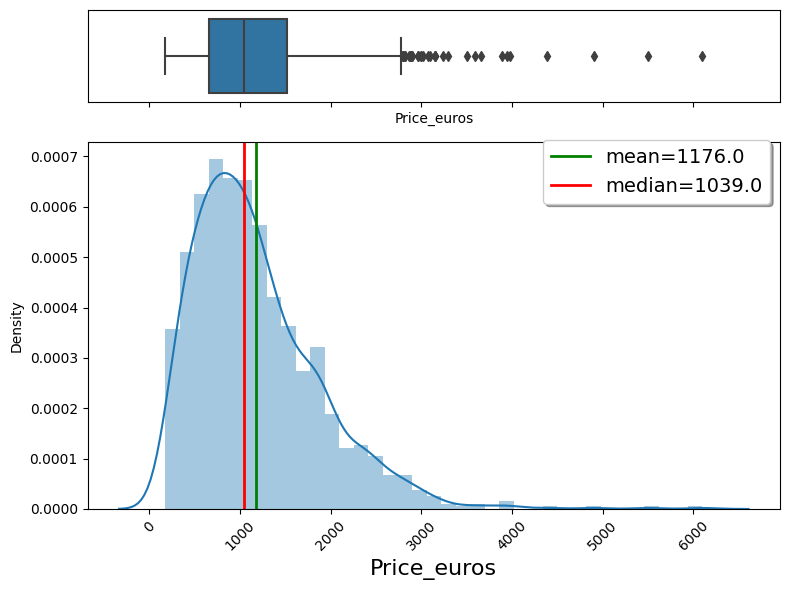

In [ ]:
numerical(df,'Price_euros')

제거된 Outlier 개수: 34


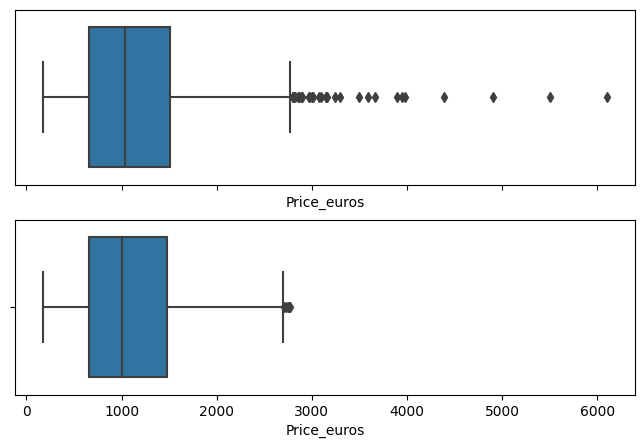

In [ ]:
outlier_remove(df, "Price_euros")

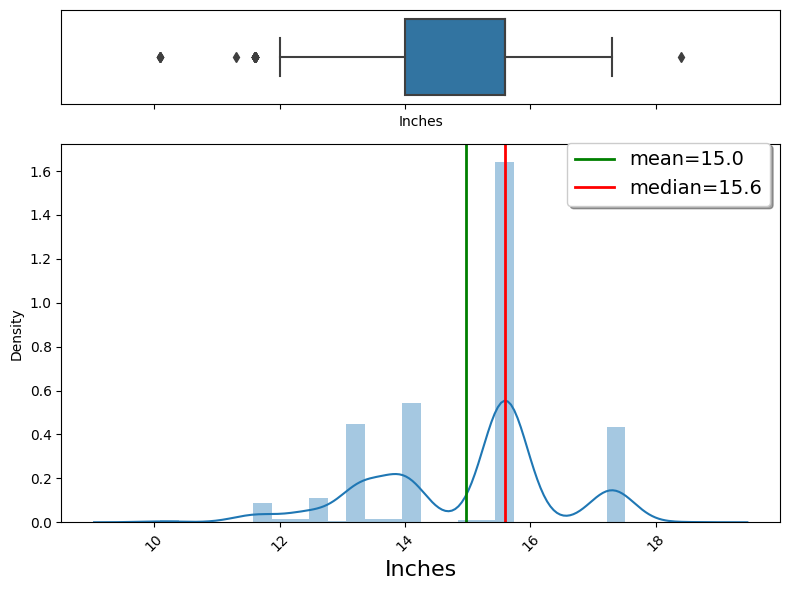

In [ ]:
numerical(df,'Inches')

제거된 Outlier 개수: 37


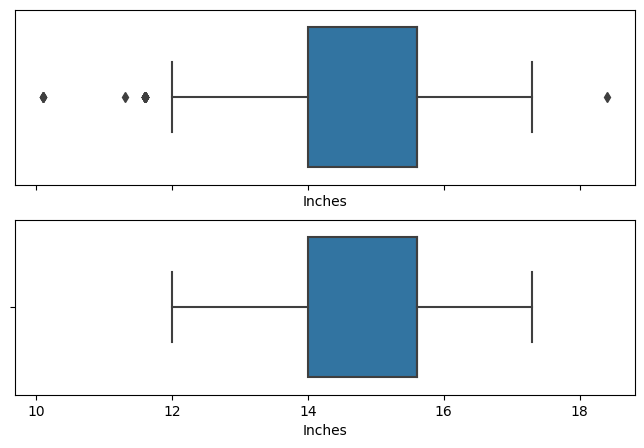

In [ ]:
outlier_remove(df, "Inches")

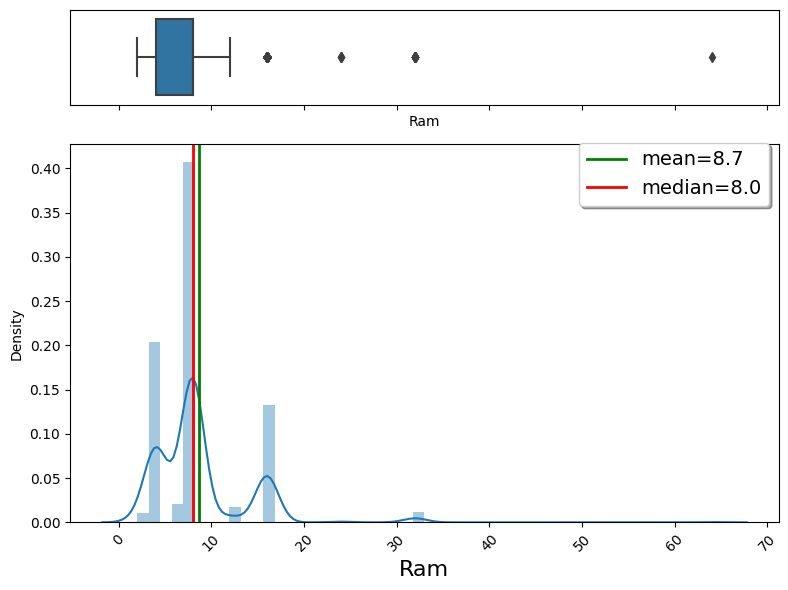

In [ ]:
numerical(df,'Ram')

In [ ]:
df['Ram'].value_counts()

8     599
4     300
16    195
6      31
12     25
32     17
2      16
24      3
64      1
Name: Ram, dtype: int64

In [ ]:
clean_list = [64, 24]
df = df[~df['Ram'].isin(clean_list)]

In [ ]:
df['Ram'].value_counts()

8     599
4     300
16    195
6      31
12     25
32     17
2      16
Name: Ram, dtype: int64

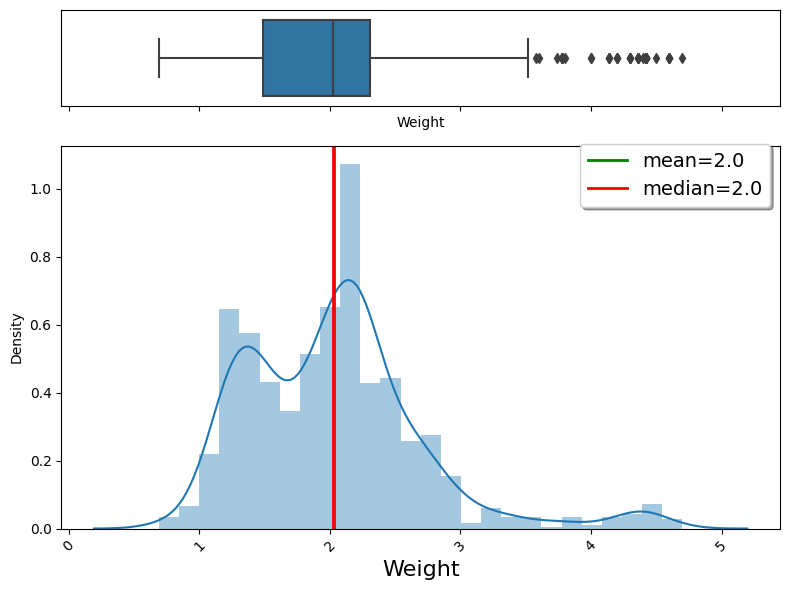

In [ ]:
numerical(df,'Weight')

In [ ]:
df['Weight'].value_counts()

2.20    104
2.00     40
2.40     40
2.10     39
2.30     36
       ... 
3.80      1
1.19      1
1.85      1
1.55      1
2.34      1
Name: Weight, Length: 167, dtype: int64

제거된 Outlier 개수: 43


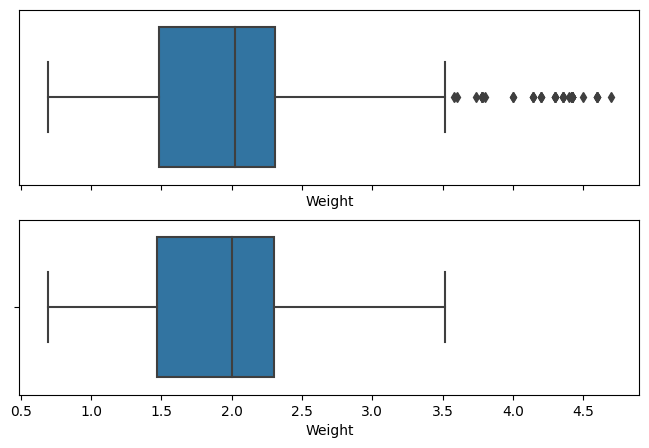

In [ ]:
outlier_remove(df, "Weight")

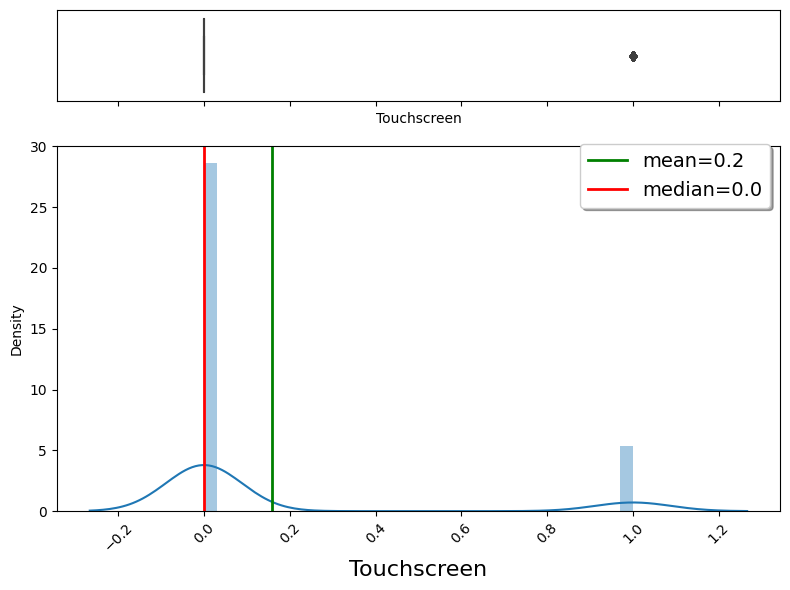

In [ ]:
numerical(df,'Touchscreen')

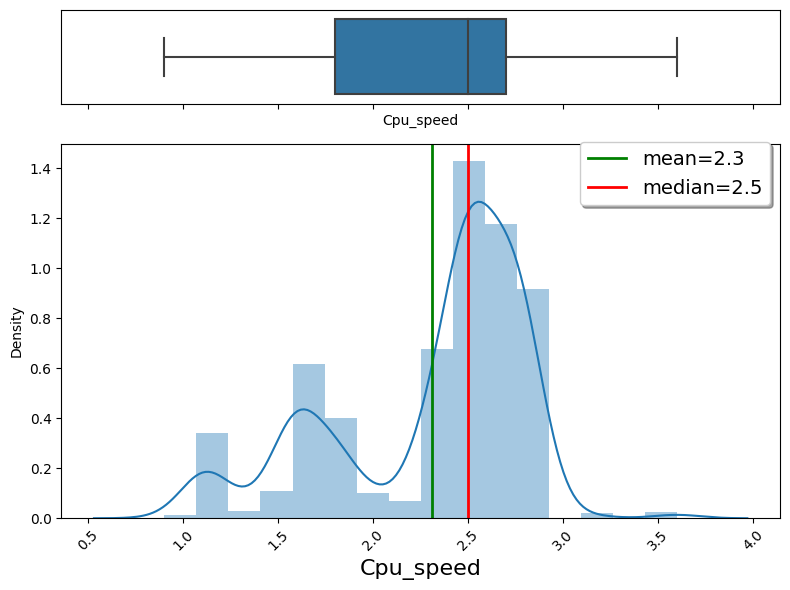

In [ ]:
numerical(df,'Cpu_speed')

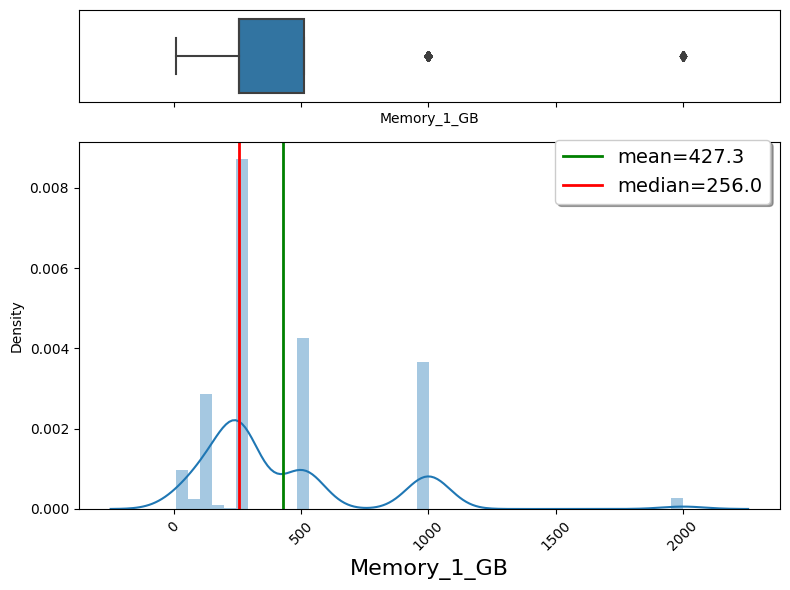

In [ ]:
numerical(df,'Memory_1_GB')

In [ ]:
df['Memory_1_GB'].value_counts()

256.0     489
1000.0    205
128.0     161
512.0     134
500.0     104
32.0       43
2000.0     15
64.0       14
16.0       10
180.0       5
240.0       1
8.0         1
508.0       1
Name: Memory_1_GB, dtype: int64

In [ ]:
clean_list = [240.0, 8.0, 508.0]
df = df[~df['Memory_1_GB'].isin(clean_list)]

In [ ]:
df['Memory_1_GB'].value_counts()

256.0     489
1000.0    205
128.0     161
512.0     134
500.0     104
32.0       43
2000.0     15
64.0       14
16.0       10
180.0       5
Name: Memory_1_GB, dtype: int64

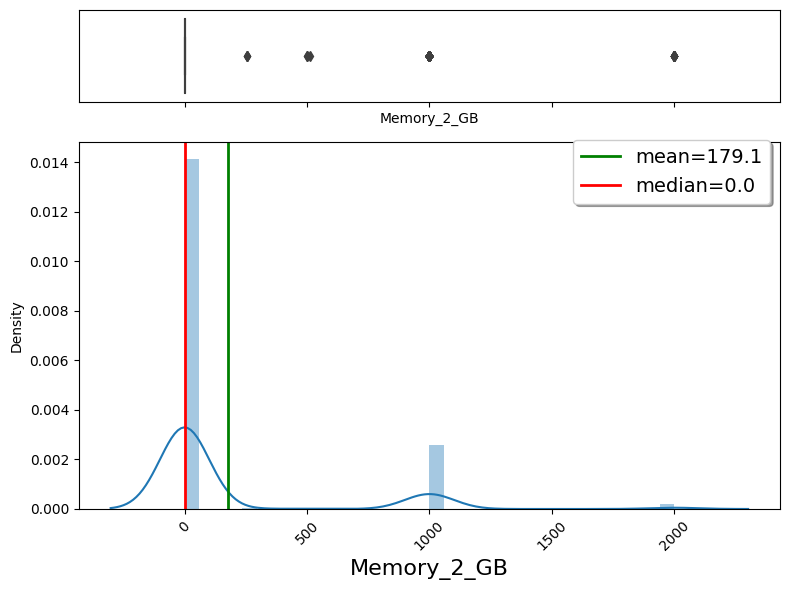

In [ ]:
numerical(df,'Memory_2_GB')

In [ ]:
df['Memory_2_GB'].value_counts()

0.0       980
1000.0    179
2000.0     15
256.0       3
500.0       2
512.0       1
Name: Memory_2_GB, dtype: int64

In [ ]:
clean_list = [256.0, 500.0, 512.0]
df = df[~df['Memory_2_GB'].isin(clean_list)]

In [ ]:
df['Memory_2_GB'].value_counts()

0.0       980
1000.0    179
2000.0     15
Name: Memory_2_GB, dtype: int64

##범주형 변수(8개): Company, TypeName, OpSys, Resolution, Screen_type, Cpu_brand, Gpu_brand, Memory_1_type, Memory_2_type

In [ ]:
def categorical_order(df, col):
    ax=sns.countplot(x=col, data=df, palette='Paired', order = df[col].value_counts().index)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.bar_label(ax.containers[0])
    plt.show()

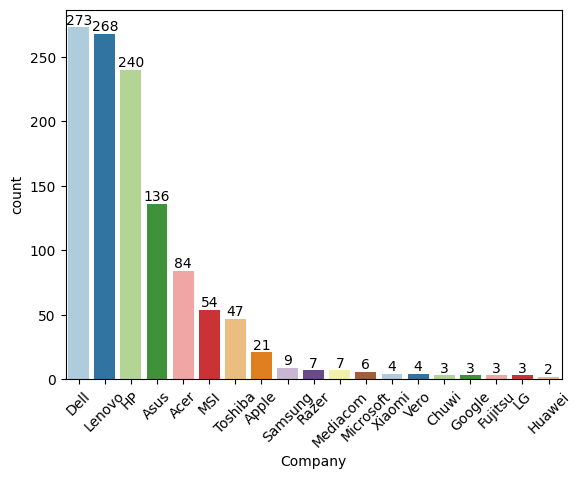

In [ ]:
categorical_order(df, 'Company')

In [ ]:
clean_list = ['Apple', 'Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi', 'Google', 'Fujitsu', 'LG', 'Huawei']
print(len(df[df['Company'].isin(clean_list)]))
df = df[~df['Company'].isin(clean_list)]

72


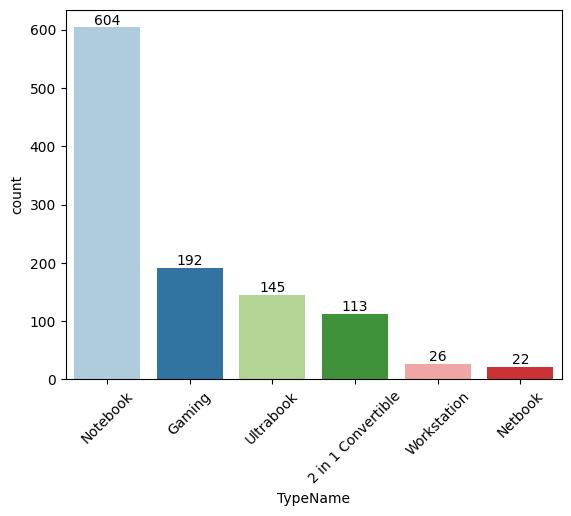

In [ ]:
categorical_order(df, 'TypeName')

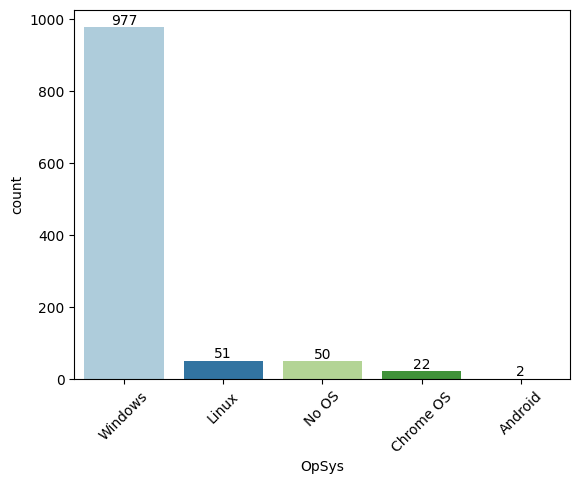

In [ ]:
categorical_order(df, 'OpSys')

In [ ]:
clean_list = ['Android']
df = df[~df['OpSys'].isin(clean_list)]

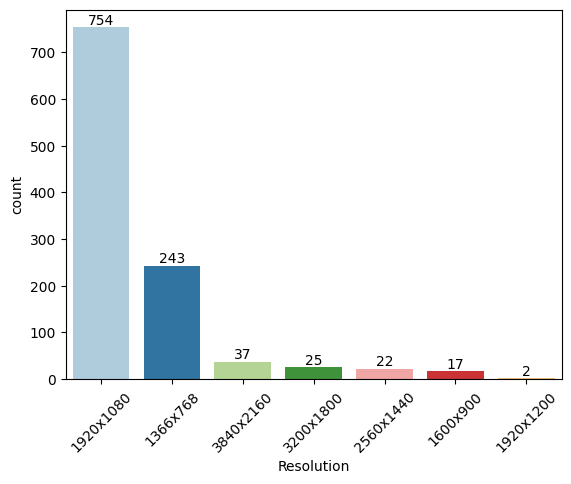

In [ ]:
categorical_order(df, 'Resolution')

In [ ]:
clean_list = ['1920x1200']
df = df[~df['Resolution'].isin(clean_list)]

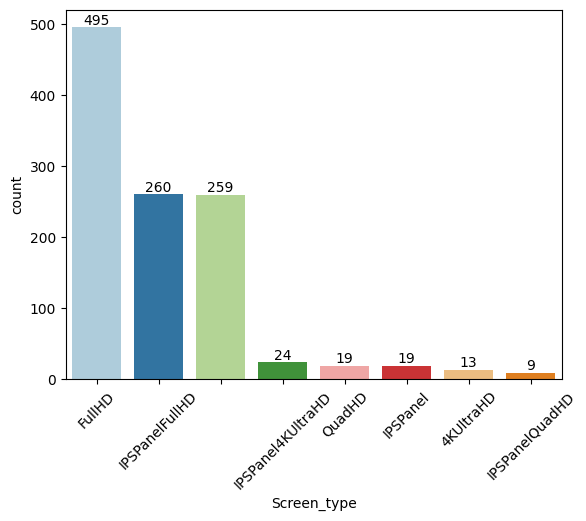

In [ ]:
categorical_order(df, 'Screen_type')

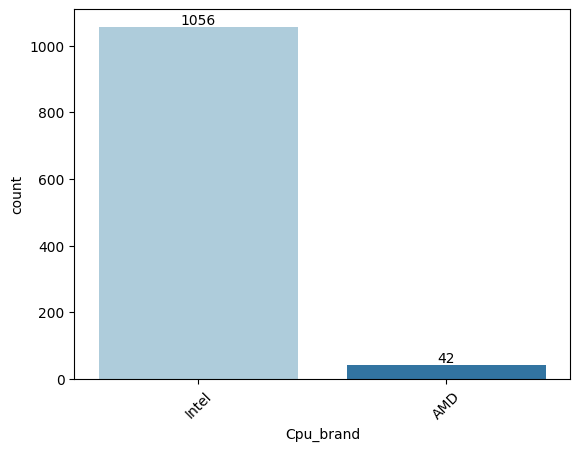

In [ ]:
categorical_order(df, 'Cpu_brand')

In [ ]:
clean_list = ['Samsung']
df = df[~df['OpSys'].isin(clean_list)]

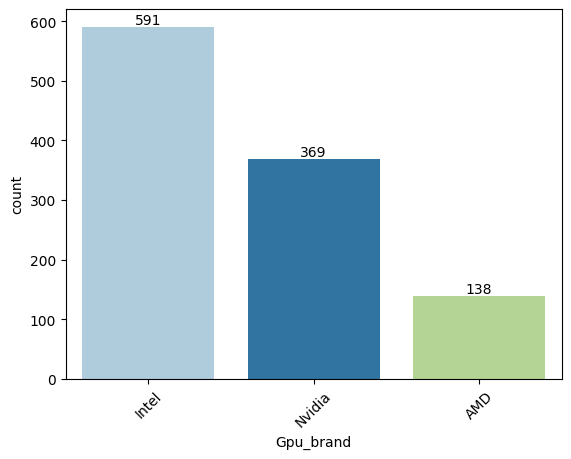

In [ ]:
categorical_order(df, 'Gpu_brand')

In [ ]:
clean_list = ['ARM']
df = df[~df['OpSys'].isin(clean_list)]

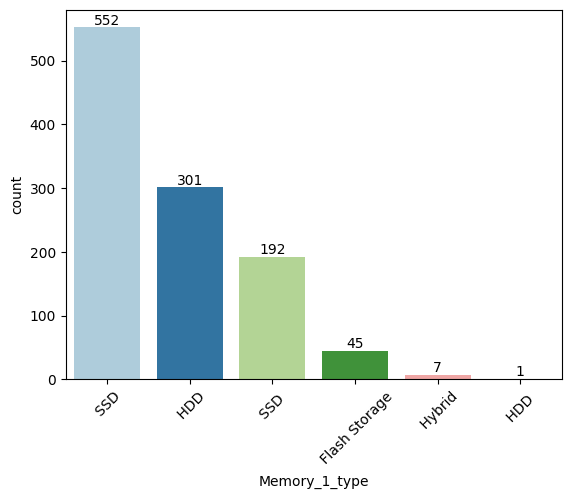

In [ ]:
categorical_order(df, 'Memory_1_type')

In [ ]:
df['Memory_1_type'].unique()

array([' SSD', ' HDD', ' Flash Storage', ' SSD ', ' Hybrid', ' HDD '],
      dtype=object)

In [ ]:
clean_list = [' HDD ', ' Hybrid']
df = df[~df['Memory_1_type'].isin(clean_list)]

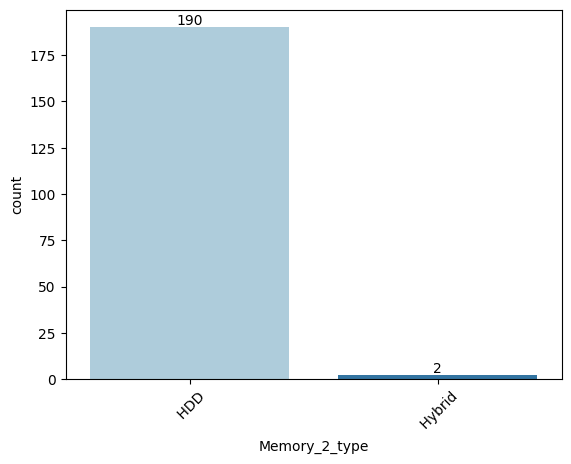

In [ ]:
categorical_order(df, 'Memory_2_type')

In [ ]:
df['Memory_2_type'].unique()

array([None, ' HDD', ' Hybrid'], dtype=object)

In [ ]:
clean_list = [' SSD', ' Hybrid']
df = df[~df['Memory_2_type'].isin(clean_list)]

## Outlier 최종 제거

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1088 entries, 2 to 1273
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1088 non-null   object 
 1   TypeName       1088 non-null   object 
 2   Inches         1058 non-null   float64
 3   Ram            1088 non-null   int64  
 4   OpSys          1088 non-null   object 
 5   Weight         1048 non-null   float64
 6   Price_euros    1063 non-null   float64
 7   Resolution     1088 non-null   object 
 8   Screen_type    1088 non-null   object 
 9   Touchscreen    1088 non-null   float64
 10  Cpu_speed      1088 non-null   float64
 11  Cpu_brand      1088 non-null   object 
 12  Gpu_brand      1088 non-null   object 
 13  Memory_1_GB    1088 non-null   float64
 14  Memory_1_type  1088 non-null   object 
 15  Memory_2_GB    1088 non-null   float64
 16  Memory_2_type  190 non-null    object 
dtypes: float64(7), int64(1), object(9)
memory usage: 153

In [ ]:
# check missing Value
df.isnull().sum().sort_values(ascending=False)

Memory_2_type    898
Weight            40
Inches            30
Price_euros       25
Cpu_speed          0
Memory_2_GB        0
Memory_1_type      0
Memory_1_GB        0
Gpu_brand          0
Cpu_brand          0
Company            0
Touchscreen        0
TypeName           0
Resolution         0
OpSys              0
Ram                0
Screen_type        0
dtype: int64

In [ ]:
# 'Cpu_speed'행의 결측치 제거
df = df.dropna(subset=['Weight', 'Inches', 'Price_euros'], how='any', axis=0)

In [ ]:
# check missing Value
df.isnull().sum().sort_values(ascending=False)

Memory_2_type    853
Touchscreen        0
Memory_2_GB        0
Memory_1_type      0
Memory_1_GB        0
Gpu_brand          0
Cpu_brand          0
Cpu_speed          0
Company            0
TypeName           0
Resolution         0
Price_euros        0
Weight             0
OpSys              0
Ram                0
Inches             0
Screen_type        0
dtype: int64

In [ ]:
len(df)

1008

#Q5

In [ ]:
df_1 = df.copy()

In [ ]:
#범주형 변수 Transformation
from sklearn.preprocessing import LabelEncoder
encode=['Company', 'TypeName', 'OpSys', 'Resolution', 'Screen_type', 'Cpu_brand', 'Gpu_brand', 'Memory_1_type', 'Memory_2_type']

#Label encoding
encoder = LabelEncoder()
for col in encode:
    df_1[col] = encoder.fit_transform(df_1[col])

In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 2 to 1273
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company        1008 non-null   int64  
 1   TypeName       1008 non-null   int64  
 2   Inches         1008 non-null   float64
 3   Ram            1008 non-null   int64  
 4   OpSys          1008 non-null   int64  
 5   Weight         1008 non-null   float64
 6   Price_euros    1008 non-null   float64
 7   Resolution     1008 non-null   int64  
 8   Screen_type    1008 non-null   int64  
 9   Touchscreen    1008 non-null   float64
 10  Cpu_speed      1008 non-null   float64
 11  Cpu_brand      1008 non-null   int64  
 12  Gpu_brand      1008 non-null   int64  
 13  Memory_1_GB    1008 non-null   float64
 14  Memory_1_type  1008 non-null   int64  
 15  Memory_2_GB    1008 non-null   float64
 16  Memory_2_type  1008 non-null   int64  
dtypes: float64(7), int64(10)
memory usage: 141.8 KB


<Axes: >

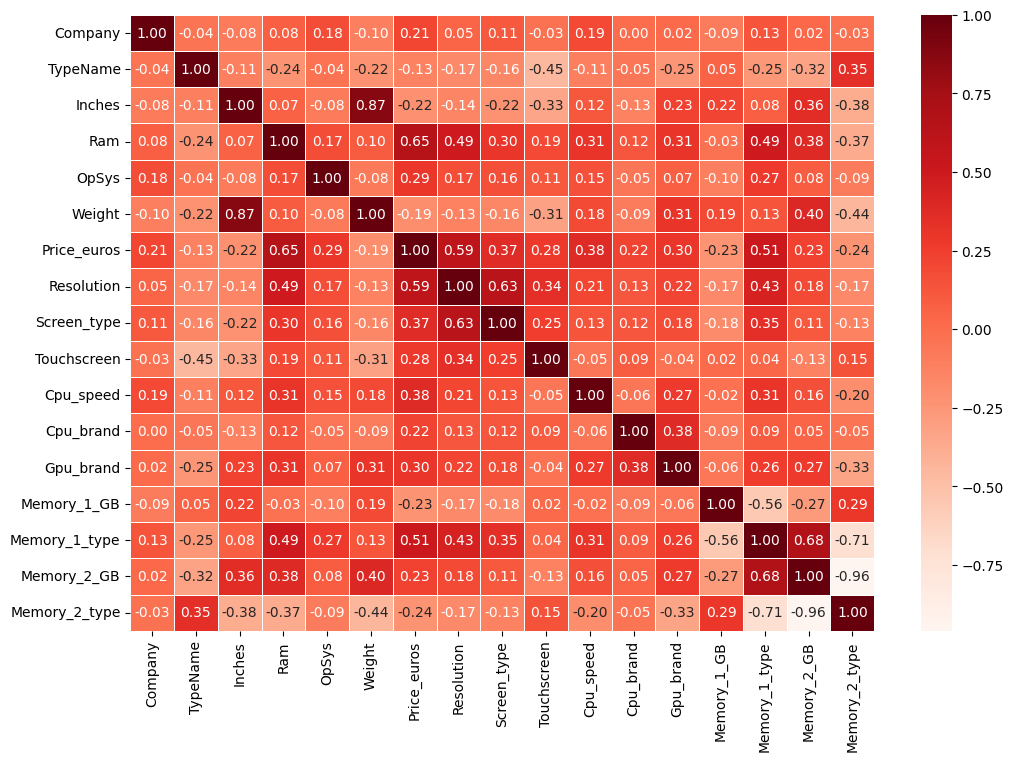

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=df_1.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Reds')

<Figure size 1200x800 with 0 Axes>

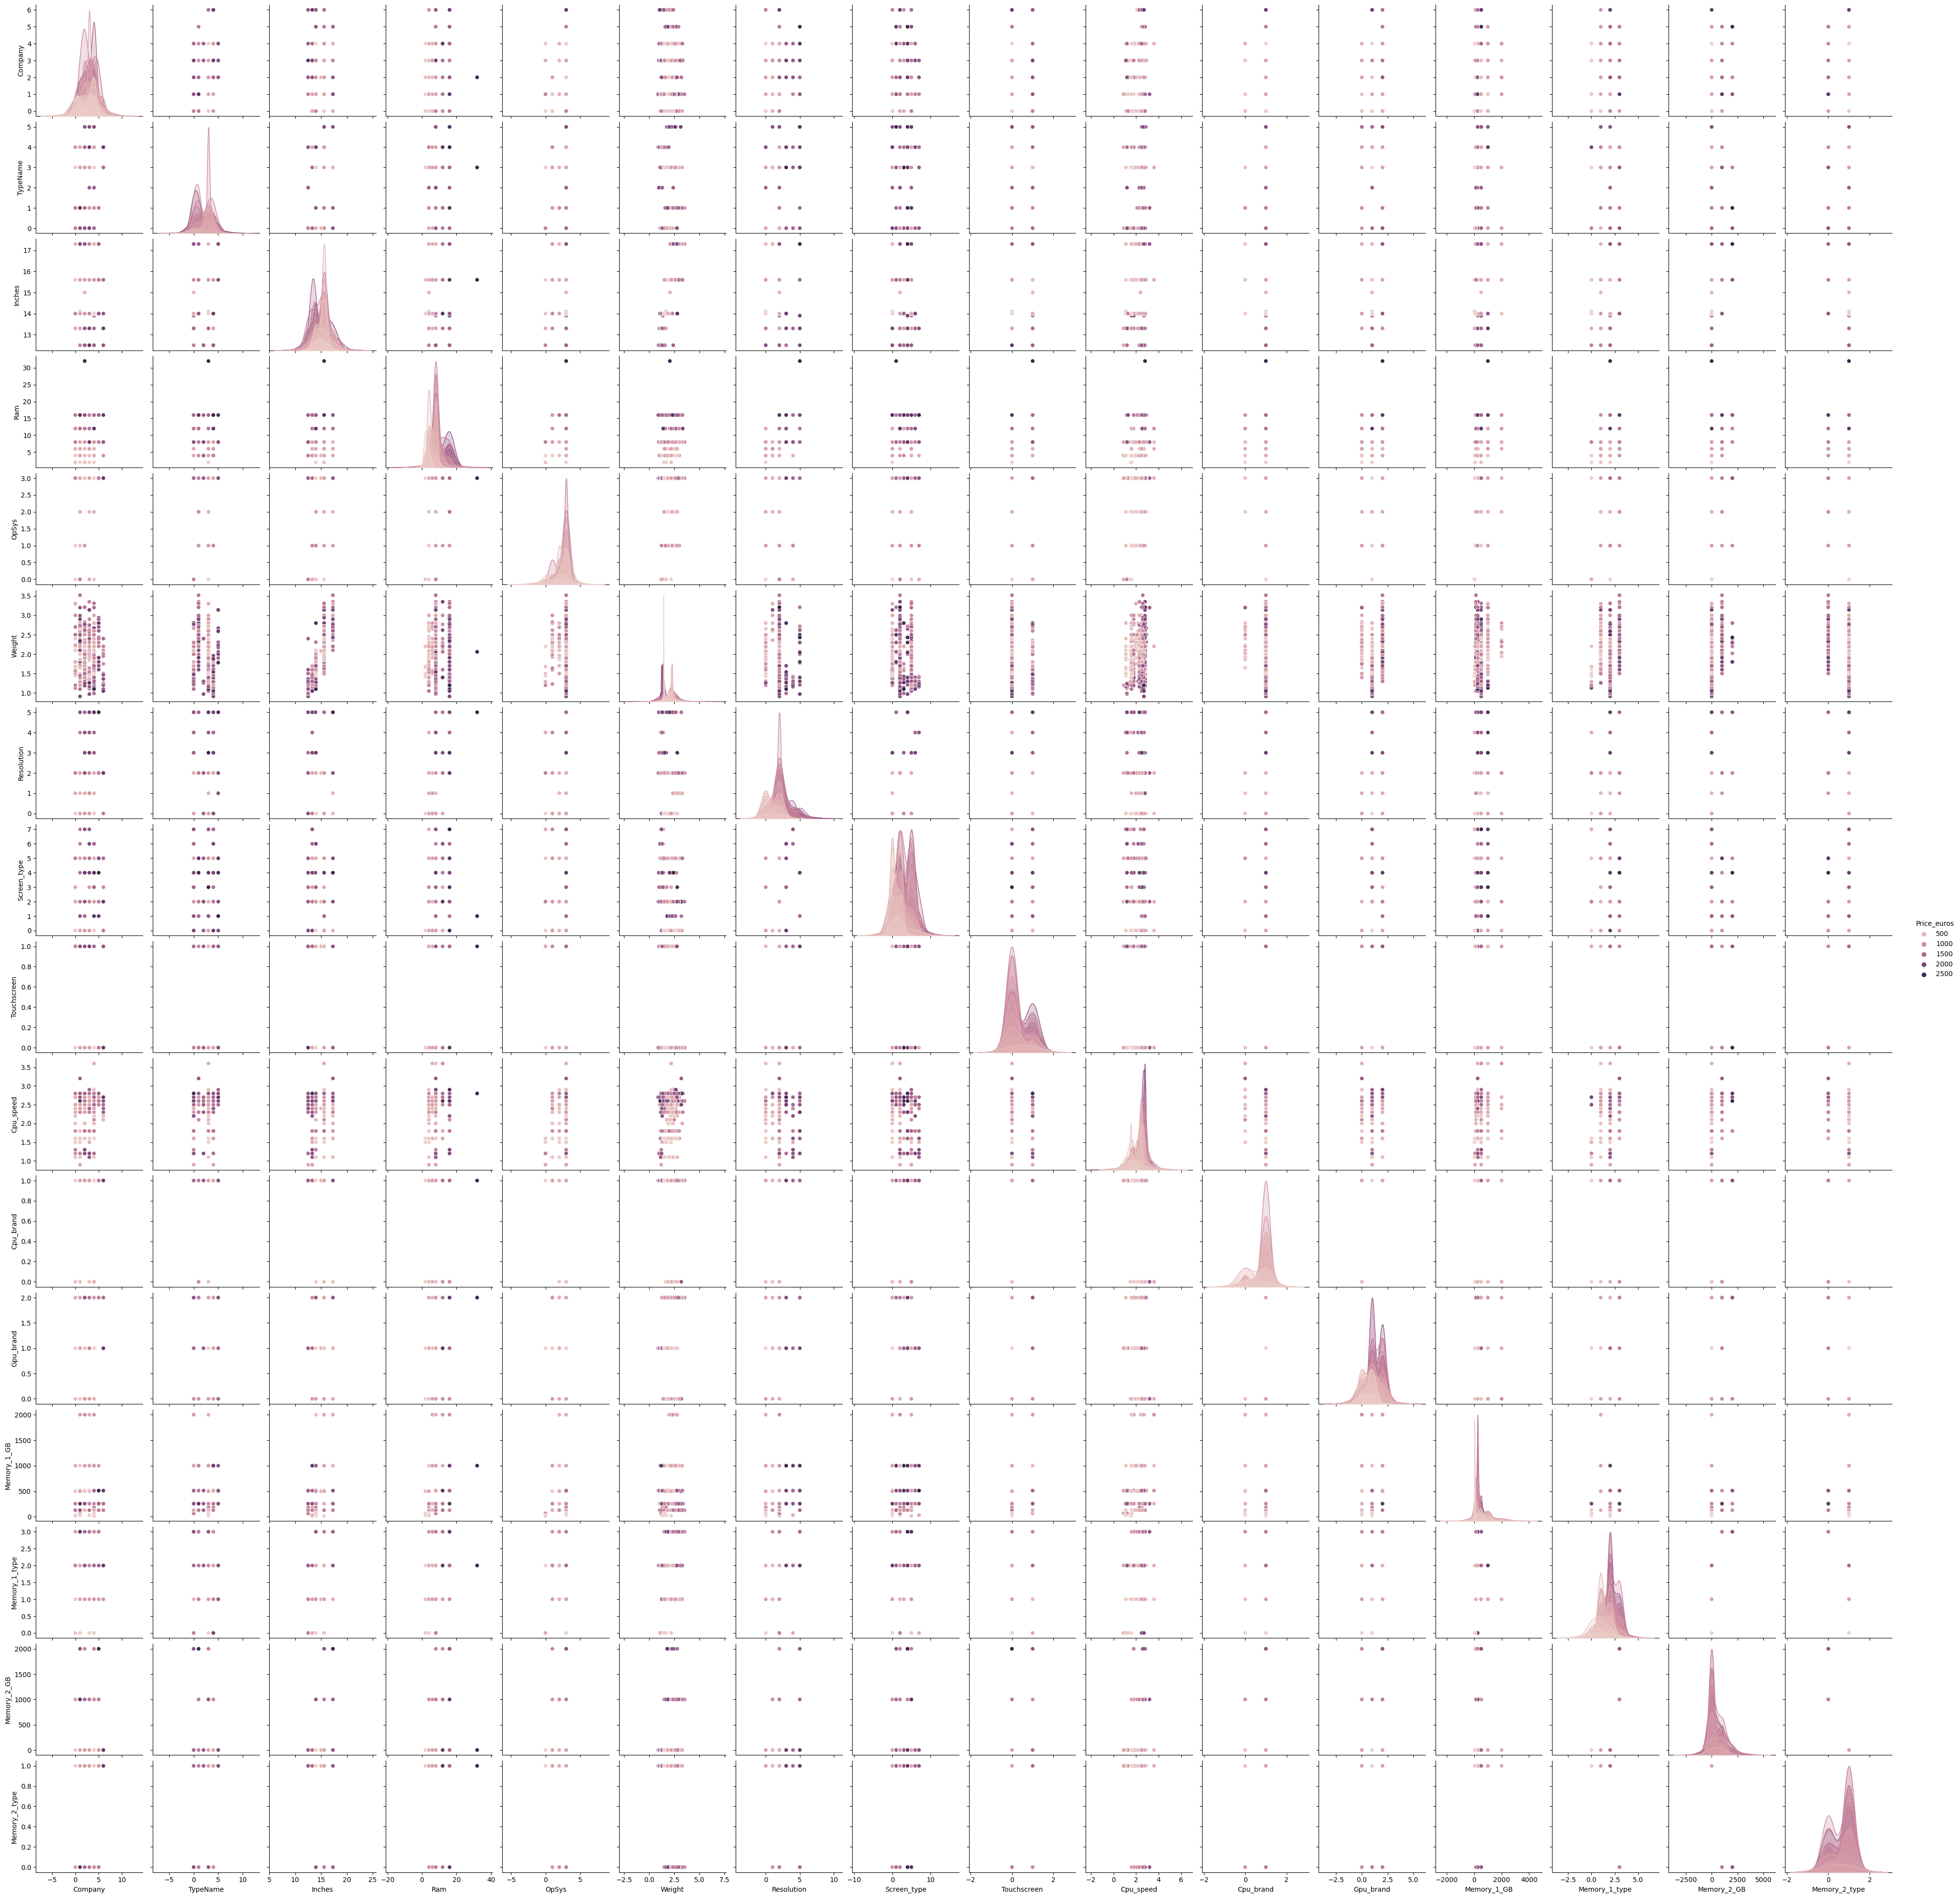

In [ ]:
plt.figure(figsize=(12, 8))
sns.pairplot(data=df_1, hue="Price_euros")

#Q6

## 모델 학습

In [ ]:
X = df_1.drop('Price_euros', axis=1)
y = df_1['Price_euros']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2023)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train, axis=1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     88.51
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          7.58e-155
Time:                        14:15:41   Log-Likelihood:                -5060.1
No. Observations:                 705   AIC:                         1.015e+04
Df Residuals:                     688   BIC:                         1.023e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -24.3318    317.198     -0.077      0.939    -647.125     598.461
Company          38.9972      8.696      4.485      0.000      21.924      56.070
TypeName         44.6945     13.053      3.424      0.001      19.067      70.322
Inches          -34.9204     21.792     -1.602      0.110     -77.708       7.867
Ram              55.9758      4.176     13.403      0.000      47.776      64.176
OpSys            78.2274     23.165      3.377      0.001      32.746     123.709
Weight         -159.2223     55.691     -2.859      0.004    -268.568     -49.877
Resolution      132.9811     16.730      7.949      0.000     100.133     165.829
Screen_type     -31.2306      8.437     -3.702      0.000     -47.796     -14.666
Touchscreen     203.2274     48.035      4.231      0.000     108.915     297.540
Cpu_speed       190.0010     30.469      6.236      0.000     130.177     249.825
Cpu_brand       231.5727     70.652      3.278      0.001      92.853     370.293
Gpu_brand        82.8214     24.301      3.408      0.001      35.108     130.535
Memory_1_GB      -0.0875      0.047     -1.852      0.064      -0.180       0.005
Memory_1_type    85.4434     34.735      2.460      0.014      17.244     153.643
Memory_2_GB       0.0383      0.122      0.314      0.754      -0.202       0.278
Memory_2_type   -13.7317    144.467     -0.095      0.924    -297.381     269.917
==============================================================================
Omnibus:                       41.079   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.490
Skew:                           0.582   Prob(JB):                     4.87e-11
Kurtosis:                       3.513   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 선형회귀 분석의 4가지 가정

In [ ]:
#VIF 함수
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(df):
  vif = pd.DataFrame()
  vif['VIF Factor'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
  vif['Features'] = df.columns
  vif = vif.sort_values("VIF Factor").reset_index(drop=True)
  return vif

In [ ]:
y_train_pred = model.predict(X_train)

df_results = pd.DataFrame({'train_real': y_train, 'train_pred': y_train_pred})
df_results['residuals'] = abs(df_results['train_real']) - abs(df_results['train_pred'])

#residuals_train = y_train - y_train_pred

In [ ]:
df_results.describe()

,train_real,train_pred,residuals
count,705.000000,705.000000,7.050000e+02
mean,1105.402270,1105.402270,-2.532717e-12
std,554.559666,454.951901,3.171044e+02
min,209.000000,79.152324,-1.069681e+03
25%,684.990000,780.192873,-2.199528e+02
50%,997.900000,1117.741802,-3.123066e+01
75%,1474.000000,1380.012499,1.797070e+02
max,2712.000000,3176.672801,1.064217e+03


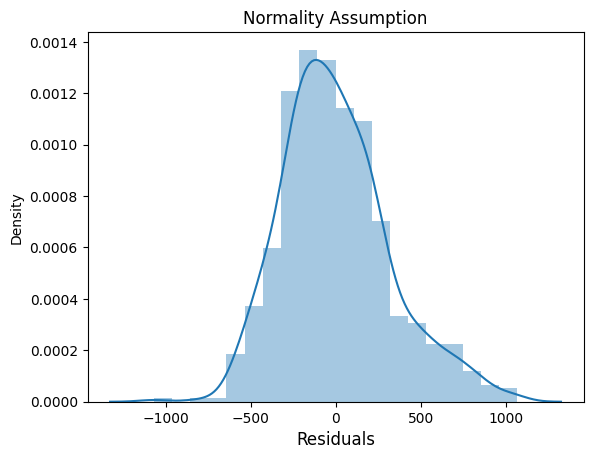

In [ ]:
#오차항이 정규분포를 따름
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((df_results['residuals']), bins = 20)
#fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 12)  
plt.title('Normality Assumption')
plt.show()

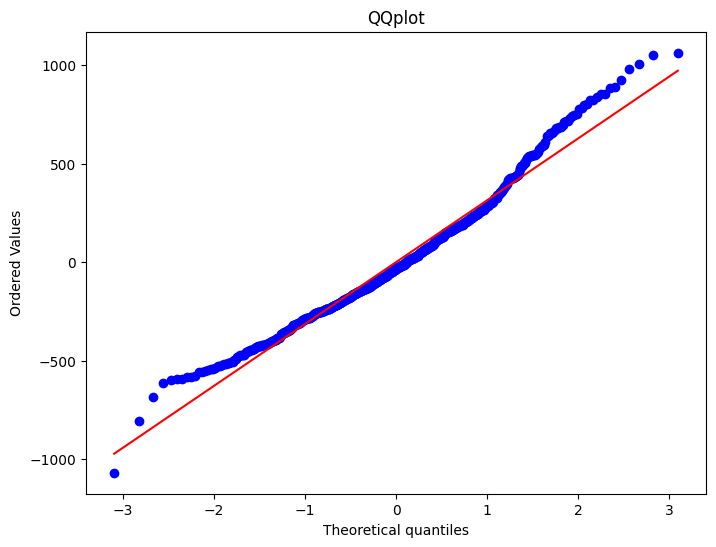

In [ ]:
#잔차의 정규성 2
plt.subplots(figsize=(8, 6))
stats.probplot(df_results['residuals'],dist=stats.norm, plot=plt)
plt.title('QQplot')
plt.show()

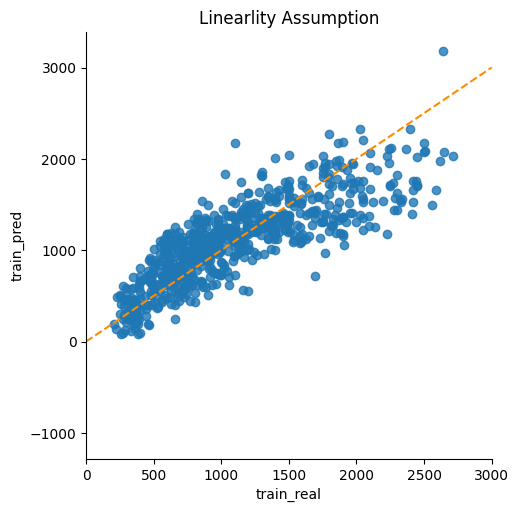

In [ ]:
#설명변수와 종속변수 사이에 선형관계가 성립
# Plotting the actual vs predicted values
sns.lmplot(x='train_real', y='train_pred', data=df_results, fit_reg=False)
        
# Plotting the diagonal line
line_coords = np.arange(df_results.min().min(), df_results.max().max())
plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
plt.xlim(0,3000)
#plt.ylim(4,10)
plt.title('Linearlity Assumption')
plt.show()

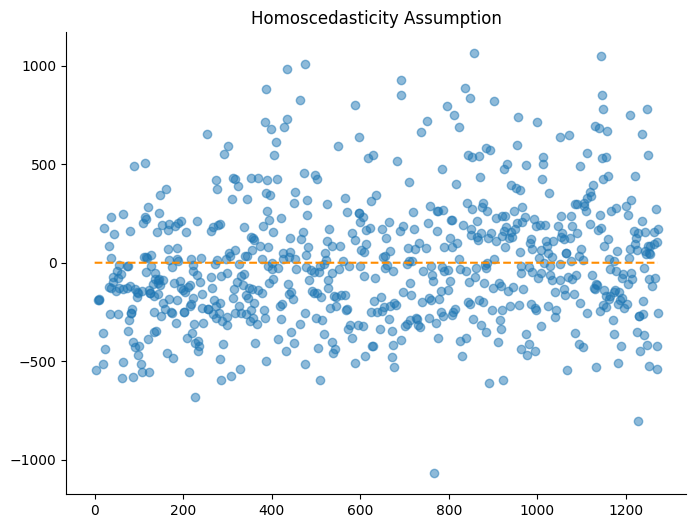

In [ ]:
#종속변수에 대한 오차항은 설명변수 값의 범위에 관계없이 일정함
# Plotting the residuals
plt.subplots(figsize=(8, 6))
ax = plt.subplot(111)  # To remove spines
plt.scatter(x=df_results.index, y=df_results.residuals, alpha=0.5)
plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
ax.spines['right'].set_visible(False)  # Removing the right spine
ax.spines['top'].set_visible(False)  # Removing the top spine
plt.title('Homoscedasticity Assumption')
plt.show()

In [ ]:
#Autocorrelation test
from statsmodels.stats.stattools import durbin_watson
print('\nPerforming Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')
durbinWatson = durbin_watson(df_results['residuals'])
print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
  print('Signs of positive autocorrelation', '\n')
  print('Assumption not satisfied')
elif durbinWatson > 2.5:
  print('Signs of negative autocorrelation', '\n')
  print('Assumption not satisfied')
else:
  print('Little to no autocorrelation', '\n')
  print('Assumption satisfied')


Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
Durbin-Watson: 2.047562696825265
Little to no autocorrelation 

Assumption satisfied


#Q8

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test,y_pred , squared=False)

print(f"MAE : {mae}")
print(f"MAPE : {mape}")
print(f"RMSE : {rmse}")

MAE : 239.39130813572442
MAPE : 0.2569335299474019
RMSE : 312.7311943551403


#Q9 & Q10

In [ ]:
df_2 = df_1.copy()

In [ ]:
df_3 = df_2.drop(columns=['Price_euros','Inches','Memory_1_GB','Memory_2_GB','Memory_1_type','Memory_2_type'], axis=1)
X = df_3
y = df_1['Price_euros']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2023)

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     117.9
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          1.37e-150
Time:                        11:24:36   Log-Likelihood:                -5082.3
No. Observations:                 705   AIC:                         1.019e+04
Df Residuals:                     693   BIC:                         1.024e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -457.9744    141.704     -3.232      0.001    -736.195    -179.754
Company        39.2808      8.909      4.409      0.000      21.789      56.773
TypeName       23.0042     12.514      1.838      0.066      -1.565      47.573
Ram            60.5763      3.955     15.317      0.000      52.811      68.341
OpSys         103.0439     23.020      4.476      0.000      57.846     148.241
Weight       -224.3469     31.780     -7.059      0.000    -286.743    -161.951
Resolution    153.3462     16.560      9.260      0.000     120.832     185.860
Screen_type   -23.4652      8.446     -2.778      0.006     -40.048      -6.883
Touchscreen   132.3916     47.135      2.809      0.005      39.848     224.935
Cpu_speed     205.6272     30.278      6.791      0.000     146.179     265.076
Cpu_brand     250.1531     72.111      3.469      0.001     108.572     391.734
Gpu_brand      83.9694     24.449      3.435      0.001      35.967     131.972
==============================================================================
Omnibus:                       37.233   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.062
Skew:                           0.559   Prob(JB):                     7.35e-10
Kurtosis:                       3.429   Cond. No.                         136.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
df_4 = df_3.drop(columns=['Screen_type'], axis=1)
X = df_4
y = df_1['Price_euros']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2023)

In [ ]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train, axis=1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     127.7
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          5.36e-150
Time:                        11:24:36   Log-Likelihood:                -5086.2
No. Observations:                 705   AIC:                         1.019e+04
Df Residuals:                     694   BIC:                         1.024e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -487.9048    141.976     -3.437      0.001    -766.659    -209.150
Company        37.4185      8.927      4.192      0.000      19.892      54.945
TypeName       24.9778     12.554      1.990      0.047       0.330      49.626
Ram            60.8599      3.973     15.320      0.000      53.060      68.660
OpSys         100.7245     23.116      4.357      0.000      55.339     146.110
Weight       -213.2391     31.679     -6.731      0.000    -275.438    -151.040
Resolution    129.8592     14.309      9.076      0.000     101.766     157.953
Touchscreen   133.8415     47.359      2.826      0.005      40.857     226.826
Cpu_speed     208.7817     30.403      6.867      0.000     149.088     268.475
Cpu_brand     244.2738     72.428      3.373      0.001     102.070     386.477
Gpu_brand      79.0257     24.501      3.225      0.001      30.920     127.132
==============================================================================
Omnibus:                       39.078   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.616
Skew:                           0.570   Prob(JB):                     2.05e-10
Kurtosis:                       3.468   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif(X)

,VIF Factor,Features
0,1.896625,Touchscreen
1,4.963401,Company
2,5.321438,Resolution
3,6.666809,Gpu_brand
4,7.073484,TypeName
5,8.420147,Ram
6,17.024944,Weight
7,21.480942,Cpu_brand
8,23.487595,OpSys
9,27.402220,Cpu_speed


In [ ]:
df_5 = df_4.drop(columns=['Weight','Cpu_brand','OpSys','Cpu_speed'], axis=1)
X = df_5
y = df_1['Price_euros']
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2023)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train, axis=1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     163.6
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          1.66e-129
Time:                        11:24:39   Log-Likelihood:                -5144.6
No. Observations:                 705   AIC:                         1.030e+04
Df Residuals:                     698   BIC:                         1.034e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -190.3267     63.783     -2.984      0.003    -315.556     -65.098
Company        63.9742      9.254      6.913      0.000      45.805      82.144
TypeName       57.4831     12.710      4.523      0.000      32.529      82.438
Ram            63.9596      4.186     15.278      0.000      55.740      72.179
Resolution    153.9824     15.290     10.070      0.000     123.962     184.003
Touchscreen   268.4809     45.972      5.840      0.000     178.222     358.740
Gpu_brand     109.1658     23.349      4.675      0.000      63.323     155.009
==============================================================================
Omnibus:                       45.826   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.147
Skew:                           0.617   Prob(JB):                     1.75e-12
Kurtosis:                       3.568   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
vif(X)

,VIF Factor,Features
0,1.512044,Touchscreen
1,3.515616,TypeName
2,3.862662,Company
3,4.312659,Gpu_brand
4,5.166537,Resolution
5,7.149027,Ram


In [ ]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test,y_pred , squared=False)

print(f"MAE : {mae}")
print(f"MAPE : {mape}")
print(f"RMSE : {rmse}")

MAE : 277.4752709636363
MAPE : 0.3006637733892616
RMSE : 357.634529938329


#Q11. Extra Question, Log Transformation

Target value shapiro test: ShapiroResult(statistic=0.9561417102813721, pvalue=8.438352655295173e-17)
log(Target value) shapiro test: ShapiroResult(statistic=0.9561417102813721, pvalue=8.438352655295173e-17)


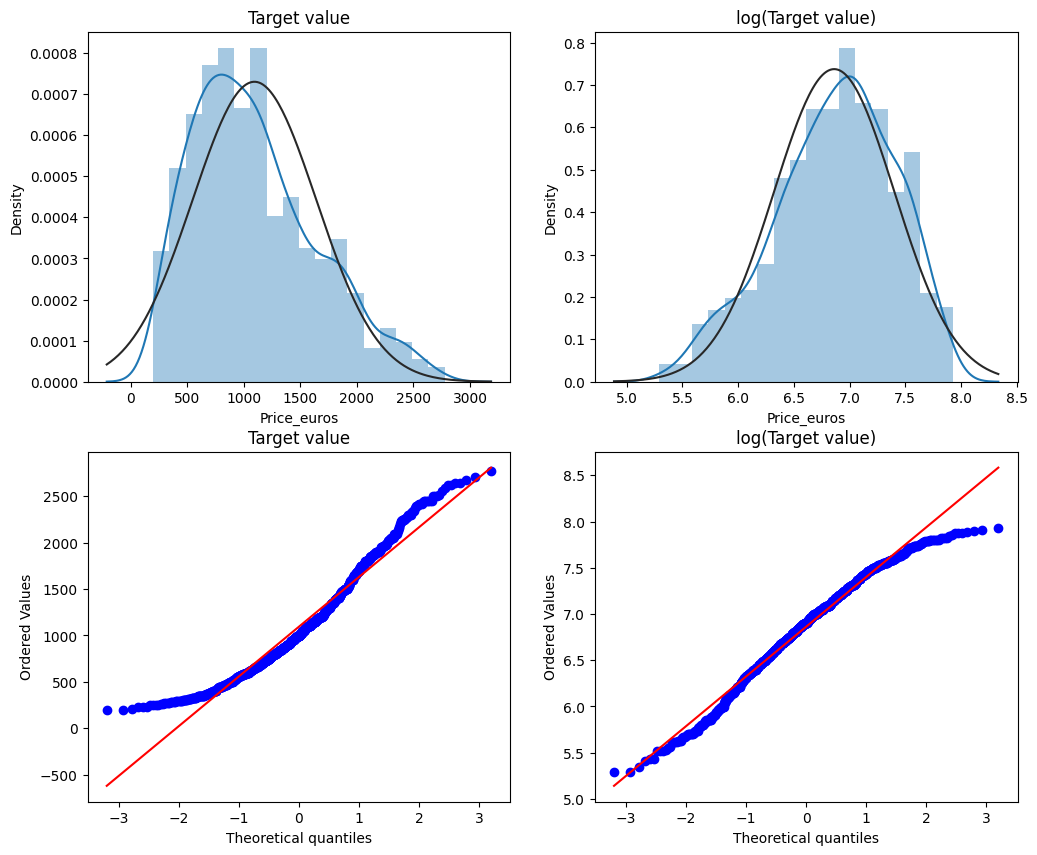

In [ ]:
from scipy.stats import norm
#왼쪽 그림
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.distplot(df['Price_euros'],fit=norm)
plt.title("Target value",size=12)

plt.subplot(2,2,3)
stats.probplot(df['Price_euros'], plot=plt)
plt.title("Target value",size=12)
print('Target value shapiro test:', shapiro(df['Price_euros']))

#오른쪽 그림
log_target = np.log(df['Price_euros'])

plt.subplot(2,2,2)
sns.distplot(log_target, fit=norm)
plt.title("log(Target value)",size=12)


plt.subplot(2,2,4)
stats.probplot(log_target, plot=plt)
plt.title("log(Target value)",size=12)
print('log(Target value) shapiro test:', shapiro(df['Price_euros']))

In [ ]:
X = df_1.drop('Price_euros', axis=1)
y = np.log(df_1['Price_euros'])
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=2023)

In [ ]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train, axis=1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_euros   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     116.9
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          8.55e-184
Time:                        14:22:41   Log-Likelihood:                -107.07
No. Observations:                 705   AIC:                             248.1
Df Residuals:                     688   BIC:                             325.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.1677      0.282     18.329      0.000       4.614       5.721
Company           0.0262      0.008      3.389      0.001       0.011       0.041
TypeName          0.0261      0.012      2.247      0.025       0.003       0.049
Inches           -0.0368      0.019     -1.900      0.058      -0.075       0.001
Ram               0.0440      0.004     11.850      0.000       0.037       0.051
OpSys             0.1127      0.021      5.473      0.000       0.072       0.153
Weight           -0.1095      0.050     -2.211      0.027      -0.207      -0.012
Resolution        0.1223      0.015      8.223      0.000       0.093       0.151
Screen_type      -0.0009      0.007     -0.125      0.901      -0.016       0.014
Touchscreen       0.0978      0.043      2.292      0.022       0.014       0.182
Cpu_speed         0.2575      0.027      9.510      0.000       0.204       0.311
Cpu_brand         0.4548      0.063      7.243      0.000       0.332       0.578
Gpu_brand         0.0368      0.022      1.705      0.089      -0.006       0.079
Memory_1_GB   -2.183e-05    4.2e-05     -0.520      0.603      -0.000    6.06e-05
Memory_1_type     0.1671      0.031      5.412      0.000       0.106       0.228
Memory_2_GB    2.251e-05      0.000      0.207      0.836      -0.000       0.000
Memory_2_type     0.0554      0.128      0.432      0.666      -0.197       0.308
==============================================================================
Omnibus:                        1.676   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.749
Skew:                           0.112   Prob(JB):                        0.417
Kurtosis:                       2.905   Cond. No.                     1.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
y_pred = model.predict(X_test)

y_pred = np.expm1(y_pred)
y_test = np.expm1(y_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mean_squared_error(y_test,y_pred , squared=False)

print(f"MAE : {mae}")
print(f"MAPE : {mape}")
print(f"RMSE : {rmse}")

MAE : 226.52242920153603
MAPE : 0.21761886043978376
RMSE : 316.69429505686867
